In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing_data = datasets.load_boston()
X = housing_data.data
y = housing_data.target

In [3]:
print "Dataset statistics:"
print "Total number of rows: ", np.shape(X)[0]
print "Total number of features: ", np.shape(X)[1]
print "Minimum target: ", np.min(y)
print "Maximum target: ", np.max(y)
print "Mean target: {0:.3f}".format(np.mean(y))
print "Median target: ", np.median(y)
print "Standard deviation of target: {0:.3f}".format(np.std(y))

Dataset statistics:
Total number of rows:  506
Total number of features:  13
Minimum target:  5.0
Maximum target:  50.0
Mean target: 22.533
Median target:  21.2
Standard deviation of target: 9.188


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [5]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=42)
ab_regressor.fit(X_train, y_train)
print ""

In [6]:
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
evs_dt = explained_variance_score(y_test, y_pred_dt)

y_pred_ab = ab_regressor.predict(X_test)
mse_ab = mean_squared_error(y_test, y_pred_ab)
evs_ab = explained_variance_score(y_test, y_pred_ab)

print "#### Decision Tree performance ####"
print "Mean squared error       =", round(mse_dt, 2)
print "Explained variance score =", round(evs_dt, 2)

print "\n\n#### AdaBoost performance ####"
print "Mean squared error       =", round(mse_ab, 2)
print "Explained variance score =", round(evs_ab, 2)

#### Decision Tree performance ####
Mean squared error       = 10.78
Explained variance score = 0.85


#### AdaBoost performance ####
Mean squared error       = 10.93
Explained variance score = 0.85


In [7]:
print dt_regressor.feature_importances_
print ab_regressor.feature_importances_

[ 0.06648376  0.          0.          0.          0.          0.66137377
  0.00658958  0.0697891   0.          0.          0.          0.
  0.19576378]
[ 0.03500805  0.00187644  0.01493102  0.0024917   0.04722433  0.22051167
  0.00867266  0.11958781  0.02059789  0.05290677  0.05729264  0.02475991
  0.39413912]


In [8]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure(figsize=(20,10)) 
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)

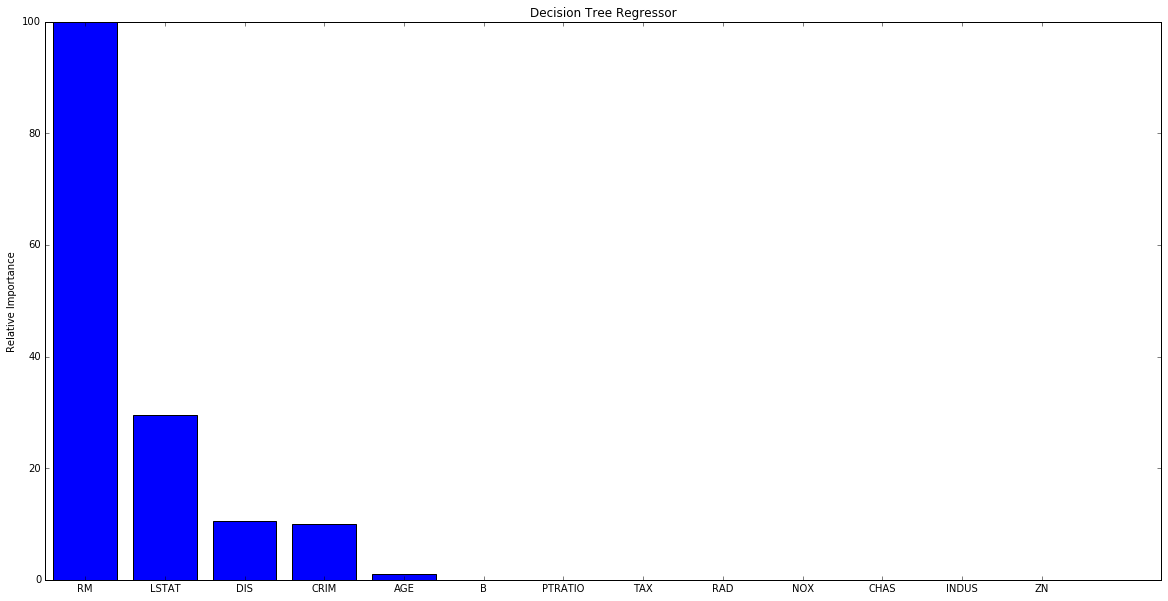

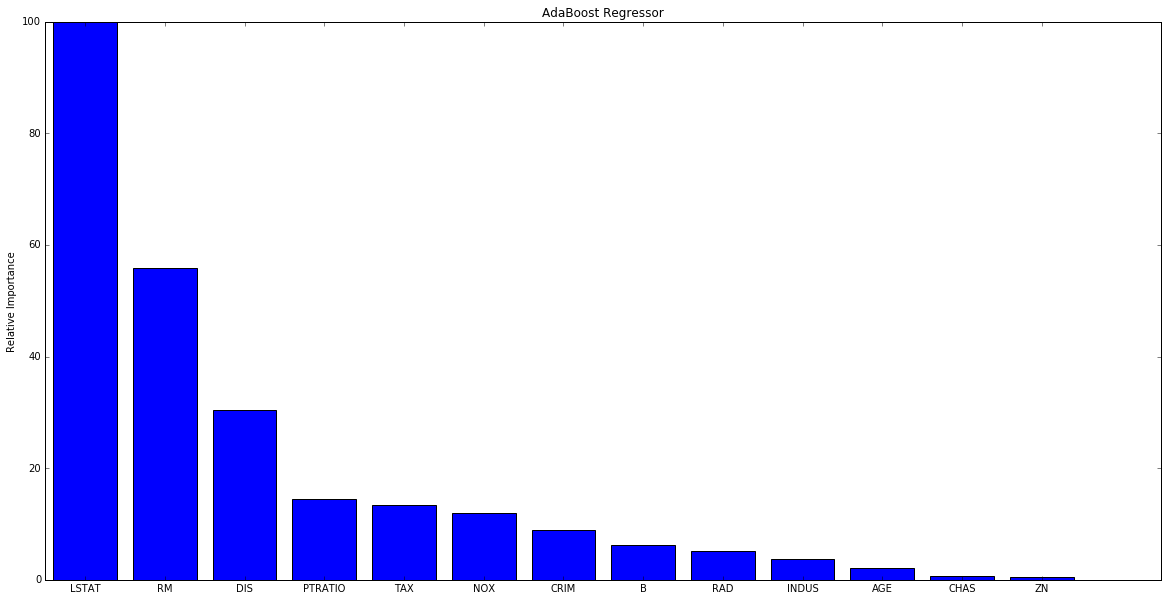

In [9]:
plot_feature_importances(dt_regressor.feature_importances_, "Decision Tree Regressor", housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, "AdaBoost Regressor", housing_data.feature_names)